In [1]:
import os
import sys

# Adjust path so 'iohub_wrapper' can be found
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import matplotlib.pyplot as plt
import numpy as np

import iohub
from iohub import open_ome_zarr

from iohub_wrapper.infection_pipeline import (
    segment_zarr,
    save_segmentations_to_zarr,
    infection_metrics_from_zarr,
)

In [2]:
DATASET2_PATH = "../dataset2/20241107_infection.zarr"
DATASET2_PATH

'../dataset2/20241107_infection.zarr'

In [3]:
infection_dataset = open_ome_zarr(DATASET2_PATH)
infection_dataset.print_tree()

/
 └── C
     └── 2
         ├── 000001
         │   └── 0 (14, 3, 10, 800, 1100) float32
         └── 001000
             └── 0 (14, 3, 10, 800, 1100) float32


# Segment Zarr


In [4]:
nuclie_zarr_name = "C/2/001000/0"
time_indices = [0, 1]
nuclie_masks = segment_zarr(
    DATASET2_PATH, nuclie_zarr_name, time_indices=time_indices, channel_idx=1
)
nuclie_masks.shape

Segmenting frames: 100%|██████████| 2/2 [00:00<00:00, 35.65it/s]


(2, 800, 1100)

In [5]:
virus_zarr_name = "C/2/001000/0"
virus_projection = infection_dataset[virus_zarr_name].numpy()[time_indices, 2]
virus_projection.shape

(2, 10, 800, 1100)

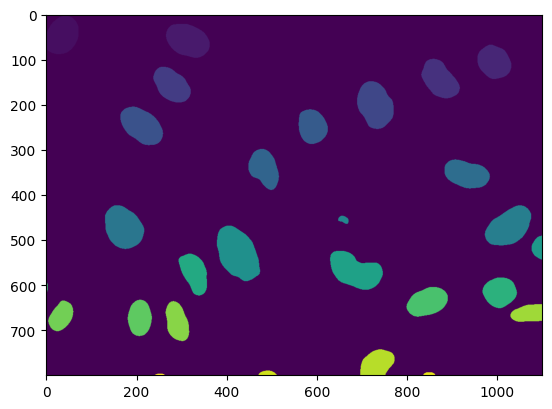

In [6]:
plt.imshow(nuclie_masks[0])

# Save Segmented Zarr


In [7]:
from iohub_wrapper.infection_pipeline import save_segmented_format

In [8]:
save_segmented_format(
    zarr_path="../dataset2/20241107_infection.zarr",
    zarr_name="C/2/001000/0",
    output_dir='./temp/visualizations',
    channel_idx=1,
    time_indices=None,
    save_mode="video",
    video_path="./temp/segmentation_video.mp4",
)

Encoding video frames: 100%|██████████| 14/14 [00:00<00:00, 126.22it/s]

Saved video at: ./temp/segmentation_video.mp4
Done. Total frames processed: 14


# Save Segmented Zarr


In [7]:
save_segmentations_to_zarr(
    nuclie_masks[:, None, None, :, :], "./outputs/nuclie_segmentations.zarr"
)

Saved segmentation masks to Zarr at: ./outputs/nuclie_segmentations.zarr


# Intensity Metrics


Segmenting frames: 100%|██████████| 1/1 [00:00<00:00, 42.51it/s]


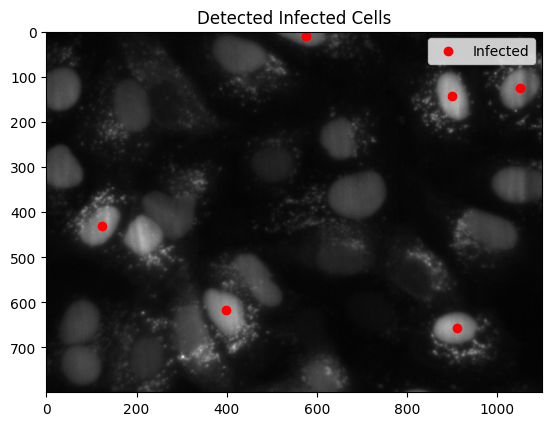

,label,area,mean_intensity,max_intensity,centroid-0,centroid-1,infected
0,1,1433.0,127.098244,133.089203,9.541521,576.383810,True
1,2,6069.0,116.234879,122.593857,50.928159,423.708683,False
2,3,5585.0,118.213226,125.937561,126.039749,33.599821,False
3,4,4882.0,129.159470,140.766922,125.468865,1049.851290,True
4,5,4660.0,140.241196,154.744888,142.434549,900.399571,True


In [10]:
infection_metrics = infection_metrics_from_zarr(
    DATASET2_PATH,
    zarr_name=nuclie_zarr_name,
    time_index=10,
    display_projections=True,
)
infection_metrics.head()

,label,area,mean_intensity,max_intensity,centroid-0,centroid-1,infected
0,1,1433.0,127.098244,133.089203,9.541521,576.383810,True
1,2,6069.0,116.234879,122.593857,50.928159,423.708683,False
2,3,5585.0,118.213226,125.937561,126.039749,33.599821,False
3,4,4882.0,129.159470,140.766922,125.468865,1049.851290,True
4,5,4660.0,140.241196,154.744888,142.434549,900.399571,True
